## DETECCIÓN DE FRAUDE EN LA RED DE ETHEREUM

Identificación de posibles carteras en la red de ETH que han interactuado con la blockchain de una manera fraudulenta: 
- Creación de scams / Interacción con smart contract
- wash trading: Compra y venta de un activo para inflar el precio.
- Relación con Rug-Pull : Tokens tradeados por cada cuenta.

Conociendo carteras fraudulentas podemos evitar todo lo que tocan o realizar otras estrategías más agresivas.

In [3]:
import pandas as pd
import funciones as fc

In [4]:
df = pd.read_csv ('data/transaction_dataset.csv')

In [5]:
df.head (5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [15]:
invest = fc.describe_df (df)

df_invest = pd.DataFrame (invest)

df_invest

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
DATA_TYPE,int64,int64,object,int64,float64,float64,float64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,27.405751,8.850727
UNIQUE_VALUES,9841,4729,9816,2,5013,6223,7810,641,727,20,...,476,1130,1309,1,1,1,70,121,304,466
CARDIN (%),100.0,48.05,99.75,0.02,50.94,63.24,79.36,6.51,7.39,0.2,...,4.84,11.48,13.3,0.01,0.01,0.01,0.71,1.23,3.09,4.74


In [18]:
unique_counts = df.nunique()

# Paso 2: Filtrar las columnas que tienen menos de 2 valores únicos
columns_to_keep = unique_counts[unique_counts < 3].index

# Paso 3: Crear un nuevo DataFrame con las columnas filtradas
filtered_df = df[columns_to_keep]

# Mostrar el DataFrame filtrado
print("\nDataFrame filtrado (columnas con <2 valores únicos):")
print(filtered_df.columns)


DataFrame filtrado (columnas con <2 valores únicos):
Index(['FLAG', ' ERC20 avg time between sent tnx',
       ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract'],
      dtype='object')


In [8]:
df ['Index'].value_counts ()

Index
1       3
1458    3
1452    3
1453    3
1454    3
       ..
3527    1
3526    1
3525    1
3524    1
4729    1
Name: count, Length: 4729, dtype: int64

In [9]:
target = df ['FLAG'].value_counts ()
target


FLAG
0    7662
1    2179
Name: count, dtype: int64

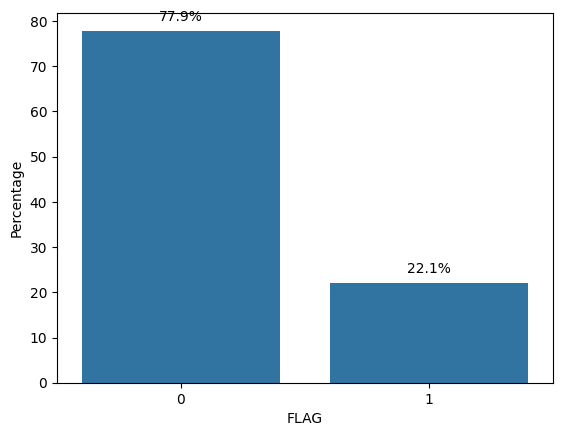

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


flag_counts = target
flag_percentages = 100 * flag_counts / len(df)


df_percentage = flag_percentages.reset_index()
df_percentage.columns = ['FLAG', 'Percentage']

sns.barplot(data=df_percentage, x='FLAG', y='Percentage')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

